<a href="https://colab.research.google.com/github/JohnMorrisonn/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Copy_of_LS_DS6_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas
- work with dataframe filtering, list comprehensions, and .apply function

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [0]:
!unzip LoanStats_2018Q4.csv.zip

In [0]:
!head LoanStats_2018Q4.csv

In [0]:
!tail LoanStats_2018Q4.csv

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd
df = pd.read_csv('LoanStats_2018Q4.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.head(20)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                 emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       5000      5000        5000             36 months  17.97%  180.69      D     D1        Administrative            6 years    MORTGAGE       59280      Source Verified     Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation      490xx    MI         10.51 0           Apr-2011         0              NaN                    NaN                    8        0       4599      19.1%      13        w                   4456.17   4456.17       895.96           895.96          543.83          352.13        0.0                0.0        0.0                     Jun-2019     180.69          Jul-2019     Jun-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            110299      0           1           0           2           14                 7150         72      0           2           0          35       24100            1      5           0            4                    18383       13800          0       0                        0           87                 92                   15                    14             2        77                   NaN                      14                    NaN                            0                     0              3               3           3         4         6             7             3                   8        0                0            0                  0                  100         

In [0]:
#It is making the data all considered as header.
#Let's skip them

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1)
#df.head().T  Transpose the headers and index
df.head()


In [0]:
df.shape

In [0]:
df.isnull().sum()

In [0]:
#Didn't drop the last two rows with no data, they were considered as cases so NaN values for all fields
df.tail()


In [0]:
#Skip the header it thinks is a case, skip footer for rows with no data, declare engine to remove warning
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

In [0]:
#Top 4 have completely NaN values
#Can drop top 4 and not lose sleep, maybe 128411 rows but might think twice

df.isnull().sum().sort_values(ascending=False)

In [0]:
#In order to save these you need to save over the original by assigning back to df or do inplace = True
#Recommends assigning back to df

df = df.drop(['id','url','desc','member_id'], axis='columns')

#or  df_dropped = df.drop....

In [0]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [0]:
df.dtypes

In [0]:
df.head()

#Int_rate should be number but is an object (string) due to percentage sign

In [0]:
#Strip whatever is in the parentheses
'17.97%'.strip('%')

#Start at nowhere, go back one from end
'17.97%'[:-1]

In [0]:
#Type casting 

type('17.97%'.strip('%'))

In [0]:
float('17.97%'.strip('%'))

In [0]:
int(float('17.97%'.strip('%')) // 1)

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [0]:
def remove_percent(string):
  return float(string.strip('%'))

Apply the function to the `int_rate` column

In [0]:
df['int_rate'] = df['int_rate'].apply(remove_percent)
df.head()

In [0]:
df.dtypes

# **List Comprehension Example**

In [0]:
example_list = ['13.56%','13.57%','13.58%']
[remove_percent(string) for string in example_list]

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title']

In [0]:
df['emp_title'].value_counts(dropna=False).head(20)

How often is `emp_title` null?

In [0]:
df['emp_title'].isnull().sum()

20947

Clean the title and handle missing values

In [0]:
import numpy as np
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [0]:
#Stripped white space before Project Manager

def clean_title(title):
  if isinstance(title,str):
    return title.strip().title()
  else:
    return 'Unknown'
  return title.strip()

[clean_title(x) for x in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].value_counts(dropna=False).head(20)

In [0]:
#[{"Nurse": ['Registered Nurse', 'Rn', 'Nurse']}, {'Manager': ['Sales Manager', 'General Manager']}]

In [0]:
#df = df.apply(lambda x: x.strip().title() if isinstance(x,str))

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
#df.emp_title  dot notation does not work in this instance
#Create a new column and True if emp_title contains Manager
df['emp_title_manager'] = df['emp_title'].str.contains('Manager')
df.head()

# **Datafram Filtering**

In [0]:
#df with only managers

df[df['emp_title_manager'] == True]

managers = df[(df['emp_title_manager'] == True)]
plebians = df[(df['emp_title_manager'] == False)]
#plebians = df[-(df['emp_title_manager'] == True)]

In [0]:
print(managers['int_rate'].mean())
print(plebians['int_rate'].mean())

12.760582149647126
12.957349045509492


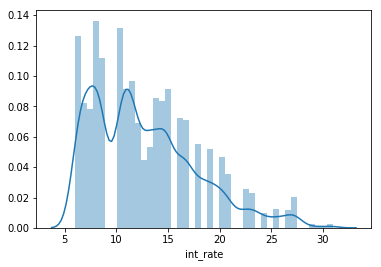

In [0]:
import seaborn as sns
sns.distplot(managers['int_rate'])

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

Import the file and prep it 

In [0]:
import pandas as pd
#Skip the first row of headers it thinks is a case, skip last two rows that are not cases
df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
#Set rows and columns to show all of them without ... separators
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

In [0]:
#Check the current type, any nulls, remove months from term values and cast type to int

df['term'].dtypes

df['term'].isnull().sum()

def remove_months(string):
  return int(string.strip('months'))

df['term'] = df['term'].apply(remove_months)

In [0]:
df['loan_status'].value_counts(dropna=False)

#Create new column 'loan_status_is_great'. Assign 1 if loan status is Current or Paid, else 0
df['loan_status_is_great'] = df['loan_status'].apply(lambda x: 1 if (x == 'Current' or x == 'Fully Paid') else 0)

#Check that value counts match
print(df['loan_status'].value_counts(dropna=False))
print(df['loan_status_is_great'].value_counts(dropna=False))

In [0]:
import numpy as np

df['last_pymnt_d'].head(20).values
# df['last_pymnt_d'].describe()
# df['last_pymnt_d'].isnull().sum()
# df[df['last_pymnt_d'].isnull()]

df['last_pymnt_d'] = df['last_pymnt_d'].fillna(method='ffill')

df['last_pymnt_d_month'] = (pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)).dt.month
df['last_pymnt_d_year'] = (pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)).dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d_month'].apply(lambda x: int(x))
df['last_pymnt_d_year'] = df['last_pymnt_d_year'].apply(lambda x: int(x))


df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                            int64
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [0]:
df[df['last_pymnt_d'].isnull()]['loan_status']

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [0]:
df2 = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)

df2['revol_util'] = df2['revol_util'].fillna(method='ffill')

def remove_percent(string):
  return float(string.strip('%'))

df2['revol_util'] = df2['revol_util'].apply(remove_percent)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
others = df2['emp_title'].value_counts(dropna=False).head(20).index

# print(others)
def replace_others(string):
  if string in others:
    pass
  else:
    return 'Other'

df2['emp_title'] = df2['emp_title'].apply(replace_others)

In [0]:
df2['emp_title'].value_counts(dropna=False).head(20)

NaN      95031
Other    33381
Name: emp_title, dtype: int64

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01